In [3]:
import pandas as pd
JPE_sorted = pd.read_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/JPE_filtered_Finalv2_cumcount.xlsx')
QJE_sorted = pd.read_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/QJE_SCOPUS_filtered_Finalv2_cumcount.xlsx')

In [8]:
JPE_sorted = JPE_sorted[['year','Affilliation']]
QJE_sorted = QJE_sorted[['year','Affilliation']]

combined_sorted = JPE_sorted.append(QJE_sorted, ignore_index=True)
print(JPE_sorted.shape)
print(QJE_sorted.shape)
print(combined_sorted.shape)


(10858, 2)
(5646, 2)
(16504, 2)


/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_80827/3941365435.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_sorted = JPE_sorted.append(QJE_sorted, ignore_index=True)


In [9]:
#Grouping into a cumullative count
Combined_cumcount = combined_sorted.sort_values(by=['year'])
Combined_cumcount['aff_cum_counts'] = Combined_cumcount.groupby('Affilliation').cumcount()
Combined_cumcount.tail()
Combined_cumcount.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/Combined_cumcount.xlsx')

In [10]:
highest_vals = Combined_cumcount.drop_duplicates(subset = ['Affilliation'], keep = 'last')
highest_vals_10 = highest_vals.nlargest(10,'aff_cum_counts')
highest_vals_10

,year,Affilliation,aff_cum_counts
16503,2020,Harvard University,575
16176,2018,University Of Chicago,562
16412,2020,Princeton University,283
16289,2019,Stanford University,263
10744,2016,Massachusetts Institute Of Technology,252
16389,2020,National Bureau of Economic Research,249
16401,2020,Columbia University,243
10695,2016,National Bureau Of Economic Research,230
16352,2020,Yale University,224
16130,2018,University Of California,216


In [12]:
a = Combined_cumcount.loc[(Combined_cumcount['Affilliation'] == highest_vals_10.iat[0,1])]
b = Combined_cumcount.loc[(Combined_cumcount['Affilliation'] == highest_vals_10.iat[1,1])]
c = Combined_cumcount.loc[(Combined_cumcount['Affilliation'] == highest_vals_10.iat[2,1])]
d = Combined_cumcount.loc[(Combined_cumcount['Affilliation'] == highest_vals_10.iat[3,1])]
e = Combined_cumcount.loc[(Combined_cumcount['Affilliation'] == highest_vals_10.iat[4,1])]
f = Combined_cumcount.loc[(Combined_cumcount['Affilliation'] == highest_vals_10.iat[5,1])]
g = Combined_cumcount.loc[(Combined_cumcount['Affilliation'] == highest_vals_10.iat[6,1])]
h = Combined_cumcount.loc[(Combined_cumcount['Affilliation'] == highest_vals_10.iat[7,1])]
i = Combined_cumcount.loc[(Combined_cumcount['Affilliation'] == highest_vals_10.iat[8,1])]
j = Combined_cumcount.loc[(Combined_cumcount['Affilliation'] == highest_vals_10.iat[9,1])]

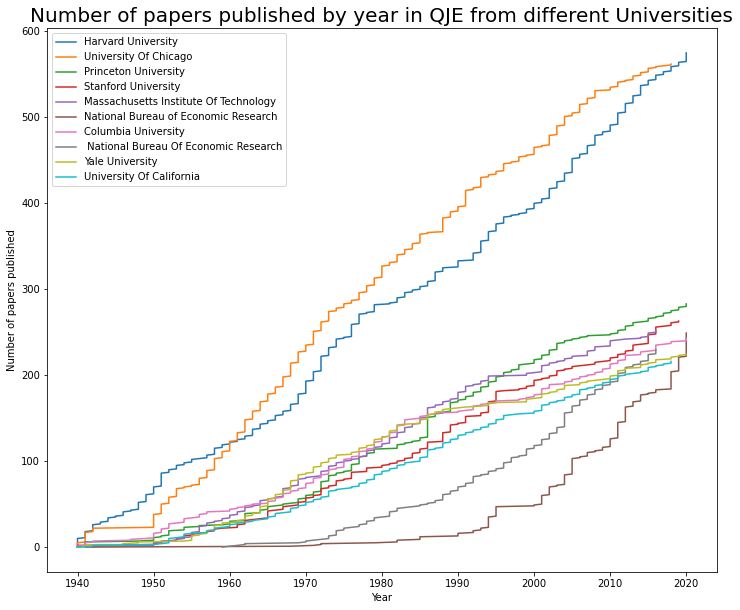

In [13]:
#Stacked plot on all years
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
plt.plot(a['year'],a['aff_cum_counts'], label = highest_vals_10.iat[0,1])
plt.plot(b['year'],b['aff_cum_counts'], label = highest_vals_10.iat[1,1])
plt.plot(c['year'],c['aff_cum_counts'], label = highest_vals_10.iat[2,1])
plt.plot(d['year'],d['aff_cum_counts'], label = highest_vals_10.iat[3,1])
plt.plot(e['year'],e['aff_cum_counts'], label = highest_vals_10.iat[4,1])
plt.plot(f['year'],f['aff_cum_counts'], label = highest_vals_10.iat[5,1])
plt.plot(g['year'],g['aff_cum_counts'], label = highest_vals_10.iat[6,1])
plt.plot(h['year'],h['aff_cum_counts'], label = highest_vals_10.iat[7,1])
plt.plot(i['year'],i['aff_cum_counts'], label = highest_vals_10.iat[8,1])
plt.plot(j['year'],j['aff_cum_counts'], label = highest_vals_10.iat[9,1])

plt.title('Number of papers published by year in QJE from different Universities', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Number of papers published')

plt.legend()
plt.show()